In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target
X = X[y<2, :2]
y = y[y<2]

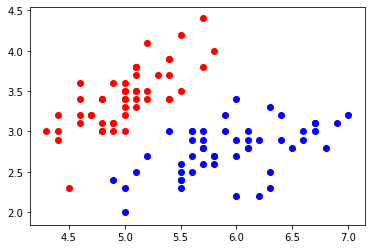

In [2]:
plt.scatter(X[y==0, 0], X[y==0, 1], color="red")
plt.scatter(X[y==1, 0], X[y==1, 1], color="blue")
plt.show()

In [3]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X)
X_standard = standardScaler.transform(X)

In [4]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C=1e9)
svc.fit(X_standard, y)

LinearSVC(C=1000000000.0)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'linewidth'


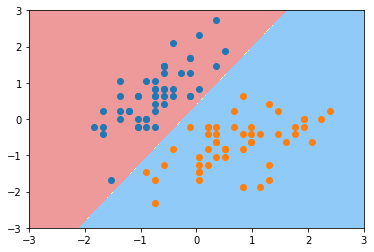

In [5]:
def plot_decision_boundary(model, axis):
    # meshgrid函数用两个坐标轴上的点在平面上画格，返回坐标矩阵
    X0, X1 = np.meshgrid(
    # 随机两组数，起始值和密度由坐标轴的起始值决定
    np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 100)).reshape(-1, 1),
    np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100)).reshape(-1, 1),
    )
    # ravel()方法将高维数组降为一维数组，c_[]将两个数组以列的形式拼接起来，形成矩阵
    X_grid_matrix = np.c_[X0.ravel(), X1.ravel()]
    # 通过训练好的逻辑回归模型，预测平面上这些点的分类
    y_predict = model.predict(X_grid_matrix)
    y_predict_matrix = y_predict.reshape(X0.shape)
    # 设置色彩表
    from matplotlib.colors import ListedColormap
    my_colormap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    # 绘制等高线，并且填充等高区域的颜色
    plt.contourf(X0, X1, y_predict_matrix, linewidth=5, cmap=my_colormap)

    
plot_decision_boundary(svc, axis=[-3, 3,-3,3])
plt.scatter(X_standard[y==0, 0], X_standard[y==0, 1])
plt.scatter(X_standard[y==1, 0], X_standard[y==1, 1])
plt.show()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'linewidth'


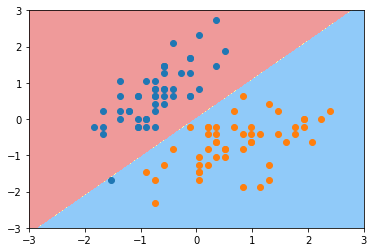

In [6]:
svc2 = LinearSVC(C=0.01)
svc2.fit(X_standard, y)

plot_decision_boundary(svc2, axis=[-3, 3,-3,3])
plt.scatter(X_standard[y==0, 0], X_standard[y==0, 1])
plt.scatter(X_standard[y==1, 0], X_standard[y==1, 1])
plt.show()

In [7]:
svc.coef_

array([[ 4.03242497, -2.50697927]])

In [8]:
def plot_svc_decision_boundary(model, axis):
    # meshgrid函数用两个坐标轴上的点在平面上画格，返回坐标矩阵
    X0, X1 = np.meshgrid(
    # 随机两组数，起始值和密度由坐标轴的起始值决定
    np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 100)).reshape(-1, 1),
    np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100)).reshape(-1, 1),
    )
    # ravel()方法将高维数组降为一维数组，c_[]将两个数组以列的形式拼接起来，形成矩阵
    X_grid_matrix = np.c_[X0.ravel(), X1.ravel()]
    # 通过训练好的逻辑回归模型，预测平面上这些点的分类
    y_predict = model.predict(X_grid_matrix)
    y_predict_matrix = y_predict.reshape(X0.shape)
    # 设置色彩表
    from matplotlib.colors import ListedColormap
    my_colormap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    # 绘制等高线，并且填充等高区域的颜色
    plt.contourf(X0, X1, y_predict_matrix, linewidth=5, cmap=my_colormap)
    
    w = model.coef_[0]
    b = model.intercept_[0]
    
    plot_x = np.linspace(axis[0], axis[1], 200)
    up_y = -w[0]/w[1] * plot_x -b/w[1] + 1/w[1]
    down_y = -w[0]/w[1] * plot_x -b/w[1] - 1/w[1]
    
    up_index = (up_y>=axis[2]) & (up_y <= axis[3])
    down_index = (down_y>=axis[2]) & (down_y<=axis[3])
    plt.plot(plot_x[up_index], up_y[up_index], color="black")
    plt.plot(plot_x[down_index], down_y[down_index], color="black")
    

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'linewidth'


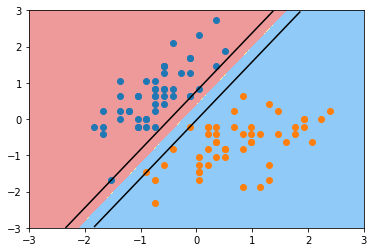

In [9]:
plot_svc_decision_boundary(svc, axis=[-3, 3,-3,3])
plt.scatter(X_standard[y==0, 0], X_standard[y==0, 1])
plt.scatter(X_standard[y==1, 0], X_standard[y==1, 1])
plt.show()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'linewidth'


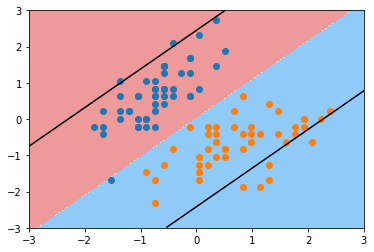

In [10]:
plot_svc_decision_boundary(svc2, axis=[-3, 3,-3,3])
plt.scatter(X_standard[y==0, 0], X_standard[y==0, 1])
plt.scatter(X_standard[y==1, 0], X_standard[y==1, 1])
plt.show()